In [1]:
data <- read.csv("dataDescriptiveStatistics.csv", sep = ";", dec = ".")

In [2]:
str(data)

'data.frame':	694 obs. of  2 variables:
 $ Distance: num  693 695 809 863 894 ...
 $ Class   : int  0 1 1 1 1 1 0 1 1 1 ...


# Emperical Cumulative Distribution Function

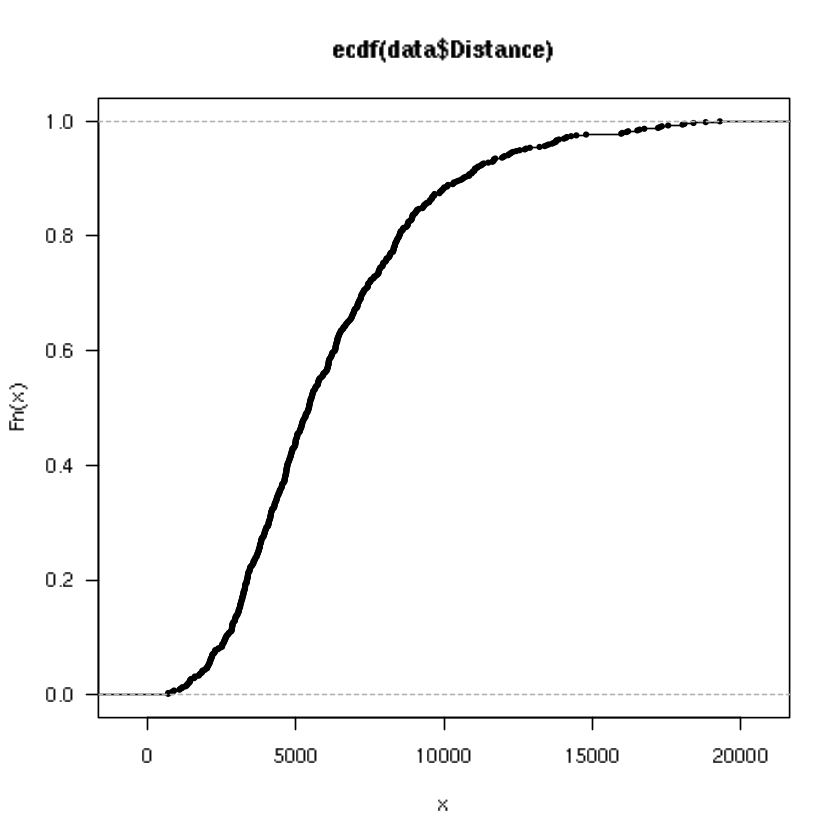

In [3]:

plot(ecdf(data$Distance), cex = 0.4, las = 1)

# Emperical Probability Density Function

In [4]:
#install.packages("MASS")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


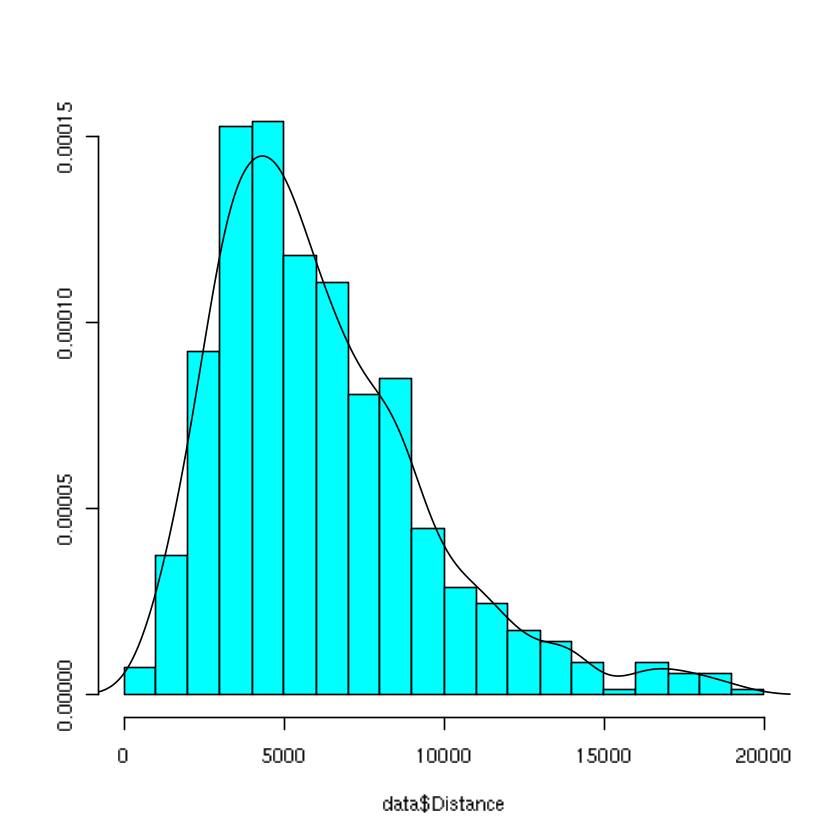

In [5]:
library("MASS")
truehist(data$Distance)
lines(density(data$Distance))

# Test on Normal Distribution

In [8]:
install.packages("nortest", repos = "https://cran.r-project.org")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
library("nortest")

In [10]:
#Anderson-Darling normality test
ad.test(data[,1])


	Anderson-Darling normality test

data:  data[, 1]
A = 12.844, p-value < 2.2e-16


p-value is very small and AD-test tells that we have to regect null hypothesys

In [13]:
#Cramer-von Mises normality test
cvm.test(data[,1])

Warning message in cvm.test(data[, 1]):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”


	Cramer-von Mises normality test

data:  data[, 1]
W = 2.0561, p-value = 7.37e-10


Again, p-value too small, data distributian is unlikely normal

In [15]:
#Lilliefors (Kolmogorov-Smirnov) normality test
lillie.test(data[,1])


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data[, 1]
D = 0.095836, p-value < 2.2e-16


In [18]:
#Pearson chi-square normality test
pearson.test(data[,1])


	Pearson chi-square normality test

data:  data[, 1]
P = 141.08, p-value < 2.2e-16


# Converting supposedly Log-Normal distribution to Normal and perfoming tests again

In [20]:
norm_data <- log(data$Distance)

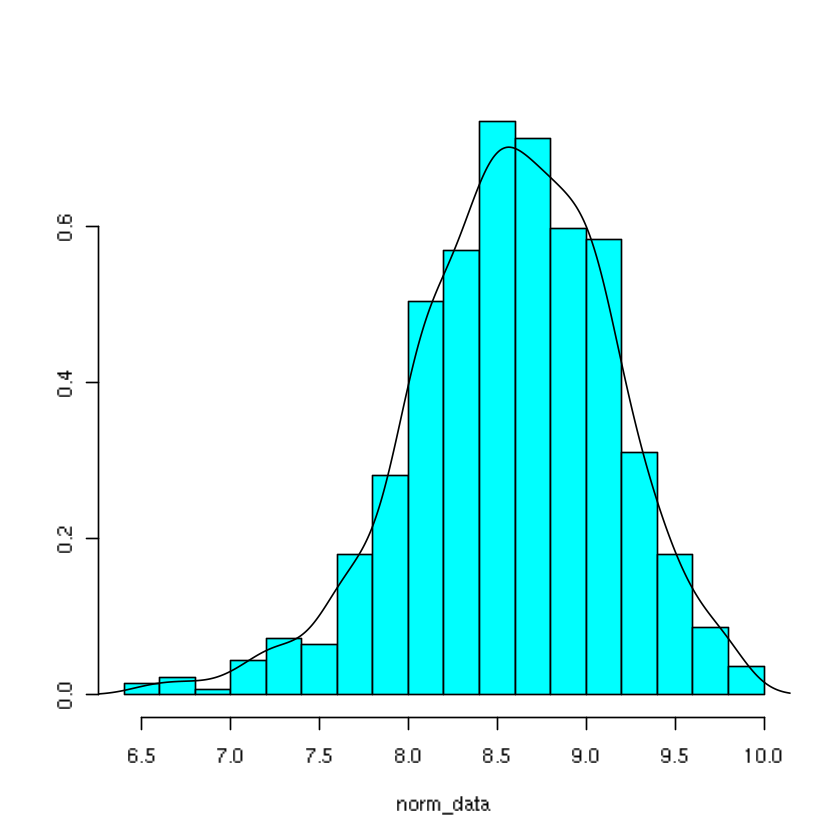

In [23]:
truehist(norm_data)
lines(density(norm_data))

In [24]:
ad.test(norm_data)


	Anderson-Darling normality test

data:  norm_data
A = 1.2167, p-value = 0.003581


AD rejects null hypothesis because distribution has assymetrical left tail

In [25]:
lillie.test(norm_data)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  norm_data
D = 0.031819, p-value = 0.09232


Lillie accepts null hypothesis with significance level a = 0.05